In [1]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [2]:
#importando as bibliotecas
import pandas as pd  #bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np #biblioteca utilizada para o tratamento eficiente de dados numéricos
import datetime  #biblioteca utilizada para trabalhar com datas
from matplotlib import pyplot as plt  #plotar os gráficos
import seaborn as sns #plot de gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_vinhos=pd.read_csv('winequality-red.csv',sep=';')

In [0]:
df_vinhos.head(10)

In [0]:
df_vinhos.shape

In [0]:
df_vinhos.info()

In [0]:
df_vinhos.isnull().sum()

In [0]:
df_vinhos.describe()

In [4]:
#contando a quantidade de valores distintos em cada uma das colunas
for colunas in list(df_vinhos.columns):
  print( "{0:25} {1}".format(colunas, df_vinhos[colunas].nunique()) )

fixed acidity             96
volatile acidity          143
citric acid               80
residual sugar            91
chlorides                 153
free sulfur dioxide       60
total sulfur dioxide      144
density                   436
pH                        89
sulphates                 96
alcohol                   65
quality                   6


In [0]:
x=df_vinhos.iloc[:,:-1].values
y=df_vinhos.iloc[:,11].values

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [8]:
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(x_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_previsto = clf_arvore.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_previsto)
print('Acurácia da àrvore de Decisão: ',acuracia)

Acurácia da àrvore de Decisão:  0.5958333333333333


In [11]:
#contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_previsto)
print(matriz_confusao)

[[  0   0   0   2   0   0]
 [  1   2  10   5   3   0]
 [  2   9 142  41  13   0]
 [  0   2  58 110  25   0]
 [  0   0   4  15  31   2]
 [  0   0   0   0   2   1]]


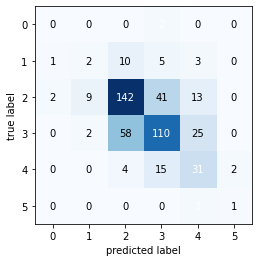

In [12]:
#realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()